In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [222]:
train_df=pd.read_csv('train.csv',encoding='latin1')
test_df=pd.read_csv('test.csv')

In [223]:
train_df.head()

,Source,Host,Link,Date(ET),Time(ET),time(GMT),Title,TRANS_CONV_TEXT,Patient_Tag
0,FORUMS,cafepharma.com,http://cafepharma.com/boards/threads/epstein.5...,6/15/2016,13:58:00,6/15/2016 23:28,Epstein,I don't disagree with you in principle. I'm ju...,0
1,FORUMS,www.patient.co.uk,http://www.patient.co.uk/forums/discuss/enlarg...,5/7/2016,0.820833333,42498.21667,Enlarged Heart.Thread Enlarged Heart,I am always dizzy I get dizzy standing up so I...,1
2,BLOG,http://abcnewsradioonline.com/entertainment-news,http://abcnewsradioonline.com/entertainment-ne...,4/14/2016,15:00:38,4/15/2016 0:30,Queen Latifah Joins American Heart Association...,Axelle/Bauer-Griffin/FilmMagic(NEW YORK) -- Qu...,0
3,FORUMS,www.cancer-forums.net,http://www.cancer-forums.net/viewtopic.php?f=1...,6/18/2016,20:46:00,6/19/2016 6:16,Bulaemia,I am 17 and I have been throwing up for about ...,1
4,FORUMS,www.diyaudio.com,http://www.diyaudio.com/forums/lounge/292252-d...,6/15/2016,3:26:00,6/15/2016 12:56,DIY Silver interconnects and RCAs???,Quote: Originally Posted by Boyan Silyavski Wa...,0


In [264]:
test_df.head()

,Index,Source,Host,Link,Date(ET),Time(ET),time(GMT),Title,TRANS_CONV_TEXT,Unnamed: 9
0,1,BLOG,uhmagonline.com,http://uhmagonline.com/son-of-the-late-kimbo-s...,7/30/2016,0:41:23,NaN,NaN,"Baby Slice, the son of the late Kimbo Slice, h...",NaN
1,2,FORUMS,implantinformationnetwork.yuku.com,http://implantinformationnetwork.yuku.com/topi...,6/20/2016,0:07:30,6/20/2016 9:37,My Story --,"<p><font face=""sans-serif"" size=""3"">I have had...",NaN
2,3,BLOG,http://cestlapharm.blogspot.com,http://cestlapharm.blogspot.com/2016/06/us-fda...,6/15/2016,15:44:00,6/16/2016 1:14,US FDA ?????canagliflozin?dapagliflozin?????????,"Previously, sodium-glucose cotransporter-2 (SG...",NaN
3,4,FORUMS,healthboards.com,http://www.healthboards.com/boards/heart-disor...,7/17/2016,19:41:00,NaN,NaN,Hello. I suffer from congestive heart failure ...,NaN
4,5,BLOG,http://www.sciencecodex.com,http://www.sciencecodex.com/vitamin_d_improves...,4/4/2016,15:30:45,4/5/2016 1:00,"Vitamin D improves heart function, study finds",A daily dose of vitamin D3 improves heart func...,NaN


In [334]:
test_df['text']=test_df['TRANS_CONV_TEXT']

In [335]:
test_df['text'].head(20)

0     Baby Slice, the son of the late Kimbo Slice, h...
1     <p><font face="sans-serif" size="3">I have had...
2     Previously, sodium-glucose cotransporter-2 (SG...
3     Hello. I suffer from congestive heart failure ...
4     A daily dose of vitamin D3 improves heart func...
5     "reuters.com A stem cell therapy developed by ...
6     Sorry, I ran out of credit http://www.buffaloi...
7     The sun will come out tomorrow....But for peop...
8                      Pathophysiology of Heart failure
9     ( http://blog.zandcell.com/vericel-stem-cell-t...
10    There's no autopsy back yet. It's extremely ir...
11    By Michelle Andrews Kaiser Health News Althoug...
12    I am the same - i cant cope anymore sat every ...
13    Natalie Cole Remembered at Grammys ? But Witho...
14    "  Every American should have the right to hea...
15    I was told by one hospital that I had an enlar...
16    >>6031646 Spironolactone increases the amount ...
17    Hispanics are more likely to have problems

In [352]:
train_df['text']=train_df['TRANS_CONV_TEXT']

In [353]:
train_df.head(10)

,Source,Host,Link,Date(ET),Time(ET),time(GMT),Title,TRANS_CONV_TEXT,Patient_Tag,text
0,FORUMS,cafepharma.com,http://cafepharma.com/boards/threads/epstein.5...,6/15/2016,13:58:00,6/15/2016 23:28,Epstein,I don't disagree with you in principle. I'm ju...,0,I don't disagree with you in principle. I'm ju...
1,FORUMS,www.patient.co.uk,http://www.patient.co.uk/forums/discuss/enlarg...,5/7/2016,0.820833333,42498.21667,Enlarged Heart.Thread Enlarged Heart,I am always dizzy I get dizzy standing up so I...,1,I am always dizzy I get dizzy standing up so I...
2,BLOG,http://abcnewsradioonline.com/entertainment-news,http://abcnewsradioonline.com/entertainment-ne...,4/14/2016,15:00:38,4/15/2016 0:30,Queen Latifah Joins American Heart Association...,Axelle/Bauer-Griffin/FilmMagic(NEW YORK) -- Qu...,0,Axelle/Bauer-Griffin/FilmMagic(NEW YORK) -- Qu...
3,FORUMS,www.cancer-forums.net,http://www.cancer-forums.net/viewtopic.php?f=1...,6/18/2016,20:46:00,6/19/2016 6:16,Bulaemia,I am 17 and I have been throwing up for about ...,1,I am 17 and I have been throwing up for about ...
4,FORUMS,www.diyaudio.com,http://www.diyaudio.com/forums/lounge/292252-d...,6/15/2016,3:26:00,6/15/2016 12:56,DIY Silver interconnects and RCAs???,Quote: Originally Posted by Boyan Silyavski Wa...,0,Quote: Originally Posted by Boyan Silyavski Wa...
5,FORUMS,forum.cyclinguk.org,http://forum.cyclinguk.org/viewtopic.php?f=24&...,4/6/2016,5:50:00,4/6/2016 15:20,Personal Question,Theres a discussion about recumbent power on B...,0,Theres a discussion about recumbent power on B...
6,FORUMS,www.reddit.com,https://www.reddit.com/r/todayilearned/comment...,5/2/2016,0.047916667,42492.44375,TIL that CVS took a $2 billion hit to annual s...,Of course! I just got diagnosed with congestiv...,1,Of course! I just got diagnosed with congestiv...
7,BLOG,http://quranfruitz.blogspot.com,http://quranfruitz.blogspot.com/2016/02/causes...,2/28/2016,3:20:00,2/28/2016 13:50,Causes of Low Blood Pressure(Hypo tension),Blood pressure is a measurement of the pressur...,0,Blood pressure is a measurement of the pressur...
8,FORUMS,hmnews.org,http://hmnews.org/health-care-news/cluster8641...,6/15/2016,17:16:00,6/16/2016 2:46,Sleep disorders may predict heart events after...,Other Sleep disorders may predict heart events...,0,Other Sleep disorders may predict heart events...
9,FORUMS,www.cafepharma.com,http://www.cafepharma.com/boards/threads/nomin...,4/29/2016,23:46:00,4/30/2016 9:16,Nominations for worst manager at Novartis,worse manager ever??? LS out of Richmond. Ugh!...,0,worse manager ever??? LS out of Richmond. Ugh!...


In [354]:
train_df['text'][2]

"Axelle/Bauer-Griffin/FilmMagic(NEW YORK) -- Queen Latifah is taking matters to heart, literally. The Emmy and Grammy winner has joined forces with the American Heart Association for its Red Steps campaign. The idea is for people to post photos of themselves taking steps while wearing red socks, to become more physically active and raise awareness of the risks and symptoms of heart failure. The goal is six million ?red steps,? in recognition of the nearly six million Americans living with heart failure For Latifah, born Dana Owens, the effort is personal. Her mother, Rita Owens, suffers from scleroderma, an incurable autoimmune disease that has caused scar tissue build up in her lungs. The 66-year-old former schoolteacher also has pulmonary hypertension, which impacts her ability to breathe. ?It's just a way for us to show support for all of those people who are dealing with the condition and those who care for them,? Latifah told ABC Radio. Latifah said her mother?s approval of the ca

In [227]:
import string
import re

In [355]:
train_df['text']=train_df['text'].str.replace('\d+','').str.replace('?','').str.replace('.','')
train_df['text'].head(20)

0     I don't disagree with you in principle I'm jus...
1     I am always dizzy I get dizzy standing up so I...
2     Axelle/Bauer-Griffin/FilmMagic(NEW YORK) -- Qu...
3     I am  and I have been throwing up for about a ...
4     Quote: Originally Posted by Boyan Silyavski Wa...
5     Theres a discussion about recumbent power on B...
6     Of course! I just got diagnosed with congestiv...
7     Blood pressure is a measurement of the pressur...
8     Other Sleep disorders may predict heart events...
9     worse manager ever LS out of Richmond Ugh! Wha...
10    Looknsee Photography wrote: When I was living ...
11    Posted by: Christian Goodman A new study revea...
12    Transparency Market Research has published a n...
13    Its been a big week here in the UK This week G...
14    Russ : So another anti-science anti-medicine p...
15    By Steven Reinberg HealthDay Reporter MONDAY, ...
16    that's not where the biggest opportunity is - ...
17    LOS ANGELES (AP)  Former first lady Nancy 

In [356]:
test_df['text']=test_df['text'].str.replace('\d+','').str.replace('?','').str.replace('.','')
test_df['text'].head(20)

0     baby slice son late kimbo slice signed profess...
1     pfont facesansserif sizei silicone salinefille...
2     previously sodiumglucose cotransporter sglt in...
3     hello suffer congestive heart failure due mi i...
4     daily dose vitamin improves heart function peo...
5     reuterscom stem cell therapy developed vericel...
6     sorry ran credit httpwwwbuffaloimplantgroupcom...
7     sun come tomorrowbut people heart failure give...
8                         pathophysiology heart failure
9     httpblogzandcellcomvericelstemcelltherapycutsh...
10    there autopsy back yet extremely irresponsible...
11    michelle andrew kaiser health news although pr...
12    cant cope anymore sat every day onnthe sofa co...
13    natalie cole remembered grammys without tribut...
14    every american right healthcare privilegedwhen...
15    told one hospital enlarged heart moved differe...
16    spironolactone increase amount potassium body ...
17    hispanic likely problem pumping heart acco

In [357]:
train_df['text'][2]

"Axelle/Bauer-Griffin/FilmMagic(NEW YORK) -- Queen Latifah is taking matters to heart, literally The Emmy and Grammy winner has joined forces with the American Heart Association for its Red Steps campaign The idea is for people to post photos of themselves taking steps while wearing red socks, to become more physically active and raise awareness of the risks and symptoms of heart failure The goal is six million red steps, in recognition of the nearly six million Americans living with heart failure For Latifah, born Dana Owens, the effort is personal Her mother, Rita Owens, suffers from scleroderma, an incurable autoimmune disease that has caused scar tissue build up in her lungs The -year-old former schoolteacher also has pulmonary hypertension, which impacts her ability to breathe It's just a way for us to show support for all of those people who are dealing with the condition and those who care for them, Latifah told ABC Radio Latifah said her mothers approval of the campaign was imp

In [358]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 10 columns):
Source             1157 non-null object
Host               1098 non-null object
Link               1157 non-null object
Date(ET)           1157 non-null object
Time(ET)           1157 non-null object
time(GMT)          996 non-null object
Title              941 non-null object
TRANS_CONV_TEXT    1156 non-null object
Patient_Tag        1157 non-null int64
text               1156 non-null object
dtypes: int64(1), object(9)
memory usage: 90.5+ KB


In [337]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 11 columns):
Index              571 non-null int64
Source             571 non-null object
Host               541 non-null object
Link               571 non-null object
Date(ET)           571 non-null object
Time(ET)           571 non-null object
time(GMT)          480 non-null object
Title              454 non-null object
TRANS_CONV_TEXT    571 non-null object
Unnamed: 9         1 non-null object
text               571 non-null object
dtypes: int64(1), object(10)
memory usage: 49.1+ KB


In [375]:
train_df.isnull().sum()

Source               0
Host                59
Link                 0
Date(ET)             0
Time(ET)             0
time(GMT)          161
Title              216
TRANS_CONV_TEXT      1
Patient_Tag          0
text                 1
dtype: int64

In [338]:
test_df.isnull().sum()

Index                0
Source               0
Host                30
Link                 0
Date(ET)             0
Time(ET)             0
time(GMT)           91
Title              117
TRANS_CONV_TEXT      0
Unnamed: 9         570
text                 0
dtype: int64

In [371]:
#new_train_df['text'].isnull()
new_train_df[new_train_df['text'].isnull()].index.tolist()

[841]

In [373]:
new_train_df=new_train_df.drop(new_train_df.index[841])

In [374]:
new_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1156 entries, 0 to 1156
Data columns (total 10 columns):
Source             1156 non-null object
Host               1097 non-null object
Link               1156 non-null object
Date(ET)           1156 non-null object
Time(ET)           1156 non-null object
time(GMT)          995 non-null object
Title              940 non-null object
TRANS_CONV_TEXT    1156 non-null object
Patient_Tag        1156 non-null int64
text               1156 non-null object
dtypes: int64(1), object(9)
memory usage: 99.3+ KB


In [376]:
new_train_df.isnull().sum()

Source               0
Host                59
Link                 0
Date(ET)             0
Time(ET)             0
time(GMT)          161
Title              216
TRANS_CONV_TEXT      0
Patient_Tag          0
text                 0
dtype: int64

In [366]:
new_train_df['text'][770]

'@Ron_Clements Updated at : pm ET Reggie Ragland was among six Alabama players invited to the NFL Draft in Chicago, but was a surprising first-round snub Following a report that he has an enlarged heart, the Alabama linebacker slipped into the second'

In [377]:
def remove_punctuation(txt):
    no_punct=''.join([c for c in txt if c not in string.punctuation])
    return no_punct

In [378]:
new_train_df['text']=new_train_df['text'].apply(lambda x: remove_punctuation(x))
new_train_df['text'].head()

0    I dont disagree with you in principle Im just ...
1    I am always dizzy I get dizzy standing up so I...
2    AxelleBauerGriffinFilmMagicNEW YORK  Queen Lat...
3    I am  and I have been throwing up for about a ...
4    Quote Originally Posted by Boyan Silyavski Wak...
Name: text, dtype: object

In [379]:
test_df['text']=test_df['text'].apply(lambda x: remove_punctuation(x))
test_df['text'].head()

0    baby slice son late kimbo slice signed profess...
1    pfont facesansserif sizei silicone salinefille...
2    previously sodiumglucose cotransporter sglt in...
3    hello suffer congestive heart failure due mi i...
4    daily dose vitamin improves heart function peo...
Name: text, dtype: object

In [380]:
#print(tokenizer.tokenize('it\'s something that we as a family like to share with other people because realize that by her talking about some of her medical issues, a lot of people are reaching out and saying \'Me too\' The rapper turned actress says the campaign has also helped her get healthy I am n'))

In [381]:
import nltk

In [382]:
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')

In [383]:
new_train_df['text']=new_train_df['text'].apply(lambda x: tokenizer.tokenize(x.lower()))
new_train_df['text'].head()

0    [i, dont, disagree, with, you, in, principle, ...
1    [i, am, always, dizzy, i, get, dizzy, standing...
2    [axellebauergriffinfilmmagicnew, york, queen, ...
3    [i, am, and, i, have, been, throwing, up, for,...
4    [quote, originally, posted, by, boyan, silyavs...
Name: text, dtype: object

In [384]:
test_df['text']=test_df['text'].apply(lambda x: tokenizer.tokenize(x.lower()))
test_df['text'].head()

0    [baby, slice, son, late, kimbo, slice, signed,...
1    [pfont, facesansserif, sizei, silicone, saline...
2    [previously, sodiumglucose, cotransporter, sgl...
3    [hello, suffer, congestive, heart, failure, du...
4    [daily, dose, vitamin, improves, heart, functi...
Name: text, dtype: object

In [385]:
from nltk.corpus import stopwords

In [386]:
def remove_stopwords(txt):
    words=[w for w in txt if w not in stopwords.words('english')]
    return words

In [387]:
new_train_df['text']=new_train_df['text'].apply(lambda x: remove_stopwords(x))
new_train_df['text'].head()

0    [dont, disagree, principle, im, saying, entres...
1    [always, dizzy, get, dizzy, standing, made, ge...
2    [axellebauergriffinfilmmagicnew, york, queen, ...
3    [throwing, year, nowalmost, everyday, thrown, ...
4    [quote, originally, posted, boyan, silyavski, ...
Name: text, dtype: object

In [388]:
test_df['text']=test_df['text'].apply(lambda x: remove_stopwords(x))
test_df['text'].head()

0    [baby, slice, son, late, kimbo, slice, signed,...
1    [pfont, facesansserif, sizei, silicone, saline...
2    [previously, sodiumglucose, cotransporter, sgl...
3    [hello, suffer, congestive, heart, failure, du...
4    [daily, dose, vitamin, improves, heart, functi...
Name: text, dtype: object

In [389]:
#train_df.to_csv('file_name.csv')

In [390]:
#train_df.info()

In [391]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [392]:
def word_lemmatizer(txt):
    lem_text=' '.join([lemmatizer.lemmatize(i) for i in txt])
    return lem_text

In [393]:
new_train_df['text']=new_train_df['text'].apply(lambda x: word_lemmatizer(x))

In [394]:
test_df['text']=test_df['text'].apply(lambda x: word_lemmatizer(x))

In [395]:
new_train_df.head()

,Source,Host,Link,Date(ET),Time(ET),time(GMT),Title,TRANS_CONV_TEXT,Patient_Tag,text
0,FORUMS,cafepharma.com,http://cafepharma.com/boards/threads/epstein.5...,6/15/2016,13:58:00,6/15/2016 23:28,Epstein,I don't disagree with you in principle. I'm ju...,0,dont disagree principle im saying entresto maj...
1,FORUMS,www.patient.co.uk,http://www.patient.co.uk/forums/discuss/enlarg...,5/7/2016,0.820833333,42498.21667,Enlarged Heart.Thread Enlarged Heart,I am always dizzy I get dizzy standing up so I...,1,always dizzy get dizzy standing made get slow ...
2,BLOG,http://abcnewsradioonline.com/entertainment-news,http://abcnewsradioonline.com/entertainment-ne...,4/14/2016,15:00:38,4/15/2016 0:30,Queen Latifah Joins American Heart Association...,Axelle/Bauer-Griffin/FilmMagic(NEW YORK) -- Qu...,0,axellebauergriffinfilmmagicnew york queen lati...
3,FORUMS,www.cancer-forums.net,http://www.cancer-forums.net/viewtopic.php?f=1...,6/18/2016,20:46:00,6/19/2016 6:16,Bulaemia,I am 17 and I have been throwing up for about ...,1,throwing year nowalmost everyday thrown blood ...
4,FORUMS,www.diyaudio.com,http://www.diyaudio.com/forums/lounge/292252-d...,6/15/2016,3:26:00,6/15/2016 12:56,DIY Silver interconnects and RCAs???,Quote: Originally Posted by Boyan Silyavski Wa...,0,quote originally posted boyan silyavski wake f...


In [396]:
test_df.head()

,Index,Source,Host,Link,Date(ET),Time(ET),time(GMT),Title,TRANS_CONV_TEXT,Unnamed: 9,text
0,1,BLOG,uhmagonline.com,http://uhmagonline.com/son-of-the-late-kimbo-s...,7/30/2016,0:41:23,NaN,NaN,"Baby Slice, the son of the late Kimbo Slice, h...",NaN,baby slice son late kimbo slice signed profess...
1,2,FORUMS,implantinformationnetwork.yuku.com,http://implantinformationnetwork.yuku.com/topi...,6/20/2016,0:07:30,6/20/2016 9:37,My Story --,"<p><font face=""sans-serif"" size=""3"">I have had...",NaN,pfont facesansserif sizei silicone salinefille...
2,3,BLOG,http://cestlapharm.blogspot.com,http://cestlapharm.blogspot.com/2016/06/us-fda...,6/15/2016,15:44:00,6/16/2016 1:14,US FDA ?????canagliflozin?dapagliflozin?????????,"Previously, sodium-glucose cotransporter-2 (SG...",NaN,previously sodiumglucose cotransporter sglt in...
3,4,FORUMS,healthboards.com,http://www.healthboards.com/boards/heart-disor...,7/17/2016,19:41:00,NaN,NaN,Hello. I suffer from congestive heart failure ...,NaN,hello suffer congestive heart failure due mi i...
4,5,BLOG,http://www.sciencecodex.com,http://www.sciencecodex.com/vitamin_d_improves...,4/4/2016,15:30:45,4/5/2016 1:00,"Vitamin D improves heart function, study finds",A daily dose of vitamin D3 improves heart func...,NaN,daily dose vitamin improves heart function peo...


In [397]:
#from nltk.stem import PorterStemmer
#stemmer=PorterStemmer()
#def word_stemmer(text):
#    stem_text=" ".join([stemmer.stem(i) for i in text])
#    return stem_text

#new_train_df['text']=new_train_df['text'].apply(lambda x: word_stemmer(x))
#new_train_df['text'].head(20)

In [398]:
new_train_df.head()

,Source,Host,Link,Date(ET),Time(ET),time(GMT),Title,TRANS_CONV_TEXT,Patient_Tag,text
0,FORUMS,cafepharma.com,http://cafepharma.com/boards/threads/epstein.5...,6/15/2016,13:58:00,6/15/2016 23:28,Epstein,I don't disagree with you in principle. I'm ju...,0,dont disagree principle im saying entresto maj...
1,FORUMS,www.patient.co.uk,http://www.patient.co.uk/forums/discuss/enlarg...,5/7/2016,0.820833333,42498.21667,Enlarged Heart.Thread Enlarged Heart,I am always dizzy I get dizzy standing up so I...,1,always dizzy get dizzy standing made get slow ...
2,BLOG,http://abcnewsradioonline.com/entertainment-news,http://abcnewsradioonline.com/entertainment-ne...,4/14/2016,15:00:38,4/15/2016 0:30,Queen Latifah Joins American Heart Association...,Axelle/Bauer-Griffin/FilmMagic(NEW YORK) -- Qu...,0,axellebauergriffinfilmmagicnew york queen lati...
3,FORUMS,www.cancer-forums.net,http://www.cancer-forums.net/viewtopic.php?f=1...,6/18/2016,20:46:00,6/19/2016 6:16,Bulaemia,I am 17 and I have been throwing up for about ...,1,throwing year nowalmost everyday thrown blood ...
4,FORUMS,www.diyaudio.com,http://www.diyaudio.com/forums/lounge/292252-d...,6/15/2016,3:26:00,6/15/2016 12:56,DIY Silver interconnects and RCAs???,Quote: Originally Posted by Boyan Silyavski Wa...,0,quote originally posted boyan silyavski wake f...


In [399]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [400]:
y=new_train_df['Patient_Tag']

In [401]:
x_train,x_test,y_train,y_test=train_test_split(new_train_df['text'],y,random_state=42,test_size=0.2)

In [402]:
test_csv_x=test_df['text'].values

In [403]:
test_csv_x.shape

(571,)

In [404]:
x_train.shape

(924,)

In [405]:
y_train.shape

(924,)

In [406]:
count_vectorizer=CountVectorizer(stop_words='english')

In [407]:
count_train=count_vectorizer.fit_transform(x_train.values)

In [408]:
count_train.shape

(924, 19483)

In [409]:
count_test = count_vectorizer.transform(x_test.values)

In [410]:
count_csv_test=count_vectorizer.transform(test_csv_x)

In [411]:
count_test.shape

(232, 19483)

In [412]:
print(count_vectorizer.get_feature_names()[:10])

['aa', 'aaa', 'aad', 'aadmi', 'aahfn', 'aalborg', 'aaliyah', 'aam', 'aan', 'aarati']


In [413]:
count_train.A[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [414]:
count_test.A[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [415]:
count_df = pd.DataFrame(data=count_train.A, columns=count_vectorizer.get_feature_names())

In [416]:
count_df.head()

,aa,aaa,aad,aadmi,aahfn,aalborg,aaliyah,aam,aan,aarati,...,zone,zonegran,zovirox,zubrzycki,zucchini,zurich,zyban,zylstra,zyprexa,zyrtec
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [417]:
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

In [418]:
nb_classifier=MultinomialNB()

In [419]:
nb_classifier.fit(count_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [420]:
pred=nb_classifier.predict(count_test)

In [421]:
score = metrics.accuracy_score(y_test,pred)

In [422]:
cm = metrics.confusion_matrix(y_test,pred,labels=[0,1])

In [423]:
score

0.8922413793103449

In [424]:
cm

array([[166,  13],
       [ 12,  41]], dtype=int64)

In [425]:
nb_classifier.fit(count_train,y_train)
pred_values_test=nb_classifier.predict(count_csv_test)

In [426]:
ans=pd.DataFrame(pred_values_test,columns=['Patient_Tag'])
ans['Index']=test_df['Index']
ans=ans[['Index','Patient_Tag']]
ans.head()

,Index,Patient_Tag
0,1,0
1,2,0
2,3,0
3,4,1
4,5,0


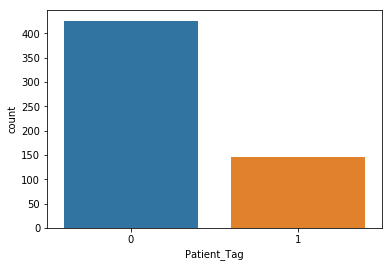

In [427]:
import seaborn as sns
sns.countplot(x='Patient_Tag',data=ans)

In [428]:
ans['Patient_Tag'].value_counts()

0    426
1    145
Name: Patient_Tag, dtype: int64

In [430]:
ans.to_csv('submission_3.csv',index=False)